# Computação vetorizada com NumPy

## Contexto: "O incrível crescimento de Python"

<img src="img/growth_major_languages-1-933x800.png" width="600">

<img src="img/tag_growth_scatter-1-1-1024x896.png" width="600">

Fonte: StackOverflow blog [The Incredible Growth of Python](https://stackoverflow.blog/2017/09/06/incredible-growth-python/)

<img src="img/related_tags_over_time-1-1000x1000.png" width="600">

Fonte: StackOverflow blog [Why is Python Growing So Quickly?](https://stackoverflow.blog/2017/09/14/python-growing-quickly/)


## Exemplo 1: MRUV

> Exemplo do livro *Programming for Computations - Python: A Gentle Introduction to Numerical Simulations with Python* de Svein Linge e Hans Petter Langtangen.

Altura ao longo do tempo de um objeto lançado verticalmente:

$$y = {v_0}t + \frac{g{t^2}}{2}$$

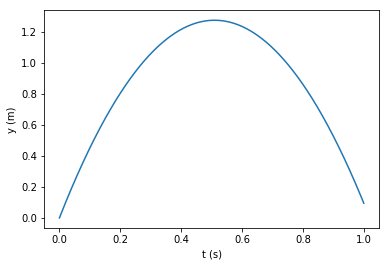

In [1]:
import numpy as np
import matplotlib.pyplot as plt

v0 = 5
g = -9.81
t = np.linspace(0, 1, 1001)

y = v0 * t + g * t**2 / 2

plt.plot(t, y)
plt.xlabel('t (s)')
plt.ylabel('y (m)')
plt.show()

## Exemplo 2: Random Walk

Exemplo adaptado de Nicolas P. Rougier em [From Python to Numpy](http://www.labri.fr/perso/nrougier/from-python-to-numpy/)

### Random walk: solução OO

In [2]:
import random

class RandomWalker:
    
    def __init__(self):
        self.position = 0
        self.path = []

    def step(self):
        self.position += random.choice([-1, 1])
        self.path.append(self.position)
    
    def walk(self, steps):
        for _ in range(steps):
            self.step()
        return self.path

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
walker = RandomWalker()
walker.walk(10)

[1, 0, 1, 0, 1, 2, 3, 2, 1, 0]

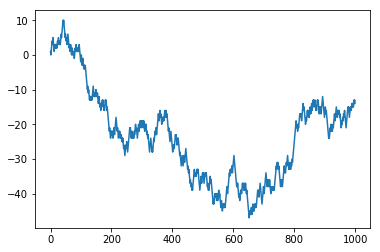

In [6]:
walker = RandomWalker()
plt.plot(walker.walk(1000))
plt.show()

In [7]:
%%timeit -n 1000
walker.walk(1000)

1000 loops, best of 3: 1.68 ms per loop


### Random Walk: solução procedural

In [8]:
def random_walk(n):
    position = 0
    walk = [position]
    for i in range(n):
        position += random.choice([-1, 1])
        walk.append(position)
    return walk

In [9]:
%%timeit -n 1000
walk = random_walk(1000)

1000 loops, best of 3: 1.29 ms per loop


### Random Walk: solução vetorizada com `itertools`

In [10]:
from itertools import accumulate
g = accumulate([1,2,3,4,5])
g

In [11]:
next(g), next(g), next(g)

(1, 3, 6)

In [12]:
list(g)

[10, 15]

In [13]:
g = accumulate([1,2,3,4,5])
list(g)

[1, 3, 6, 10, 15]

In [15]:
def random_walk_itertools(n):
    steps = random.choices([-1, 1], k=n)  # choice plural, Py ≥ 3.6
    return [0]+list(accumulate(steps))

In [16]:
%%timeit -n 1000
walk = random_walk_itertools(1000)

1000 loops, best of 3: 322 µs per loop


### Random Walk: solução vetorizada com NumPy

In [17]:
import numpy as np
np.random.choice([-1, 1], 10)

array([ 1,  1, -1,  1, -1, -1,  1,  1,  1,  1])

In [18]:
def random_walk_numpy(n):
    steps = np.random.choice([-1, 1], n)  # choice singular!
    return np.cumsum(steps)

In [19]:
%%timeit -n 1000
walk = random_walk_numpy(1000)

1000 loops, best of 3: 27.7 µs per loop


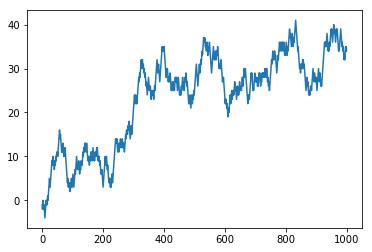

In [21]:
plt.plot(random_walk_numpy(1000))
plt.show()

## Comparando desempenhos

In [22]:
from timeit import timeit

def cronometrar(expr, vezes=1000):
    return timeit(expr, globals=globals(), number=vezes) / vezes
     
casos = ['RandomWalker().walk(1000)',
         'random_walk(1000)',
         'random_walk_itertools(1000)',
         'random_walk_numpy(1000)',
        ]

In [23]:
tempos = []
for caso in casos:
    t = cronometrar(caso)
    print(f'{t:07f}s', caso, sep='\t')
    tempos.append(t)

0.001643s	RandomWalker().walk(1000)
0.001292s	random_walk(1000)
0.000335s	random_walk_itertools(1000)
0.000028s	random_walk_numpy(1000)


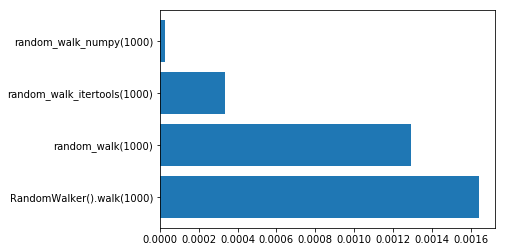

In [24]:
fig, ax = plt.subplots()
posições = np.arange(len(casos))
ax.barh(posições, tempos)
ax.set_yticks(posições)
ax.set_yticklabels(casos)
plt.show()

In [25]:
max(tempos) / min(tempos)

58.389202754254384

## Referências

* [From Python to Numpy](http://www.labri.fr/perso/nrougier/from-python-to-numpy/). Veja também a excelente [bibliografia](http://www.labri.fr/perso/nrougier/from-python-to-numpy/#bibliography) deste livro livre.
   
* StackExchange: [How do I move away from the “for-loop” school of thought?](https://softwareengineering.stackexchange.com/questions/254475/how-do-i-move-away-from-the-for-loop-school-of-thought)

* [Python is the fastest growing programming language due to a feature you've never heard of](https://jeffknupp.com/blog/2017/09/15/python-is-the-fastest-growing-programming-language-due-to-a-feature-youve-never-heard-of/)